# Importing Libraries 

In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [2]:
# define path
path =r"C:\Users\repla\Documents"

In [3]:
# Import Data
ords_prods_merge = pd.read_pickle(r"C:\Users\repla\Documents\02 Data\Prepared Data\orders_products_merged4.8.pkl")

In [4]:
ords_prods_merge.head(5)

,product_id,product_name,aisle_id,department_id,prices,order_id,user_id,order_number,orders_day_of_week,time_of_order,...,price_range_loc,busiest_day,busiest_days,busiest_period_of_day,max_order,loyalty_flag,average_price,spending_flag,median_orders,order_frequency_flag
0,1,Chocolate Sandwich Cookies,61,19,5.8,3139998,138,28,6,11,...,Mid-range product,Regularly busy,Regularly busy,Most orders,30,Regular customer,12.900000,High spender,6.5,Frequent customer
1,1,Chocolate Sandwich Cookies,61,19,5.8,1977647,138,30,6,17,...,Mid-range product,Regularly busy,Regularly busy,Average orders,30,Regular customer,12.900000,High spender,6.5,Frequent customer
2,1,Chocolate Sandwich Cookies,61,19,5.8,389851,709,2,0,21,...,Mid-range product,Busiest day,Busiest days,Average orders,5,New customer,5.288889,Low spender,7.0,Frequent customer
3,1,Chocolate Sandwich Cookies,61,19,5.8,652770,764,1,3,13,...,Mid-range product,Regularly busy,Least busy days,Most orders,3,New customer,5.800000,Low spender,9.0,Frequent customer
4,1,Chocolate Sandwich Cookies,61,19,5.8,1813452,764,3,4,17,...,Mid-range product,Least busy,Least busy days,Average orders,3,New customer,5.800000,Low spender,9.0,Frequent customer


# Creating Bar Charts

<Axes: xlabel='orders_day_of_week'>

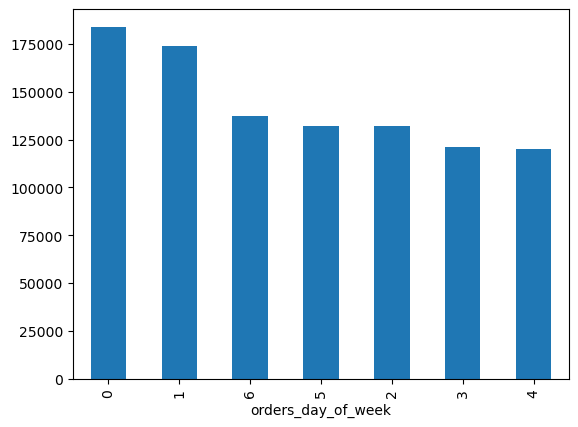

In [5]:
ords_prods_merge['orders_day_of_week'].value_counts().plot.bar()

<Axes: xlabel='orders_day_of_week'>

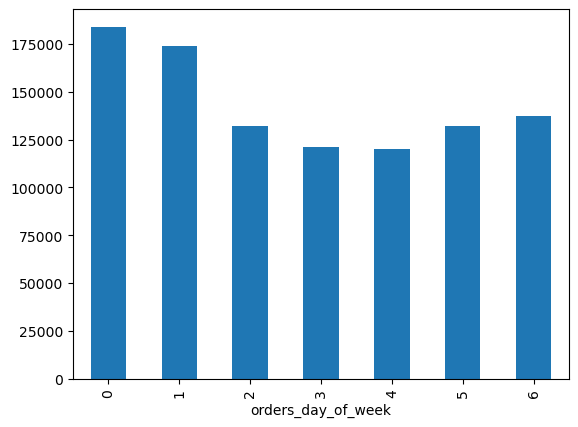

In [6]:
ords_prods_merge['orders_day_of_week'].value_counts().sort_index().plot.bar()

In [7]:
ords_prods_merge['orders_day_of_week'].value_counts().sort_index()

orders_day_of_week
0    183956
1    174070
2    132015
3    120883
4    119932
5    132019
6    137125
Name: count, dtype: int64

<Axes: xlabel='orders_day_of_week'>

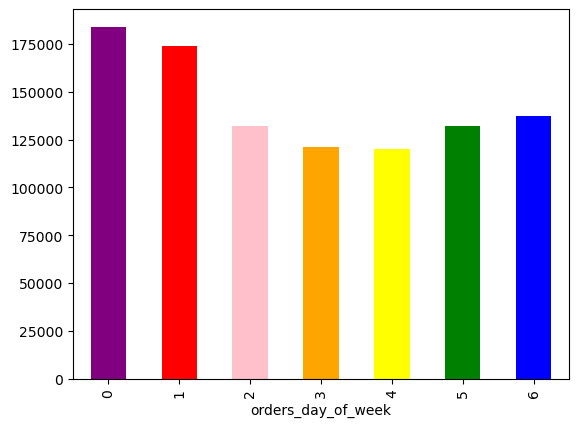

In [8]:
ords_prods_merge['orders_day_of_week'].value_counts().sort_index().plot.bar(color =['purple', 'red', 'pink', 'orange', 'yellow', 'green', 'blue'])

# Exporting Charts

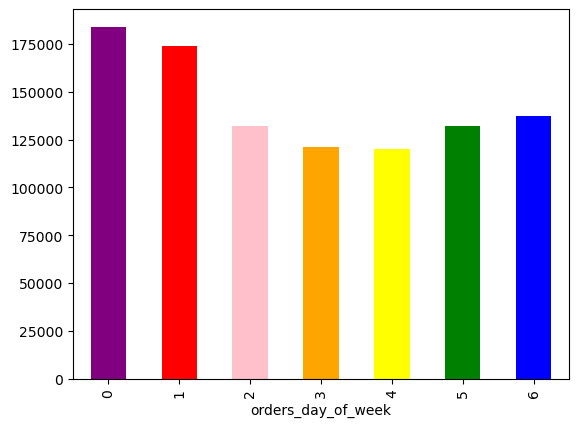

In [9]:
bar = ords_prods_merge['orders_day_of_week'].value_counts().sort_index().plot.bar(color =['purple', 'red', 'pink', 'orange', 'yellow', 'green', 'blue'])

In [10]:
#saving bar chart to file
bar.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_orders_dow.png'))

# Creating histograms and scatterplots

<Axes: ylabel='Frequency'>

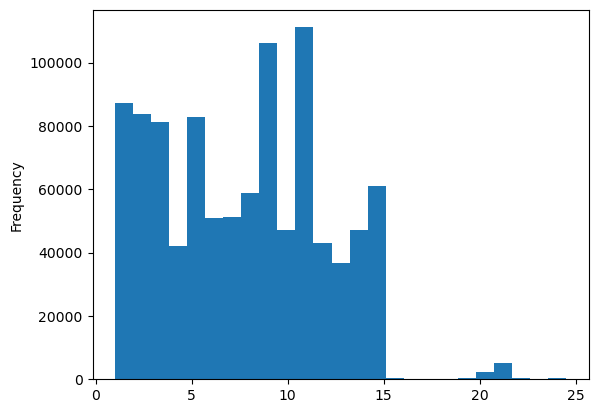

In [11]:
ords_prods_merge['prices'].plot.hist(bins = 25)

In [12]:
ords_prods_merge['prices'].describe()

count    1000000.000000
mean           7.738643
std            4.224603
min            1.000000
25%            3.800000
50%            8.000000
75%           11.300000
max           24.500000
Name: prices, dtype: float64

C:\Users\repla\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\repla\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


<Axes: xlabel='prices', ylabel='prices'>

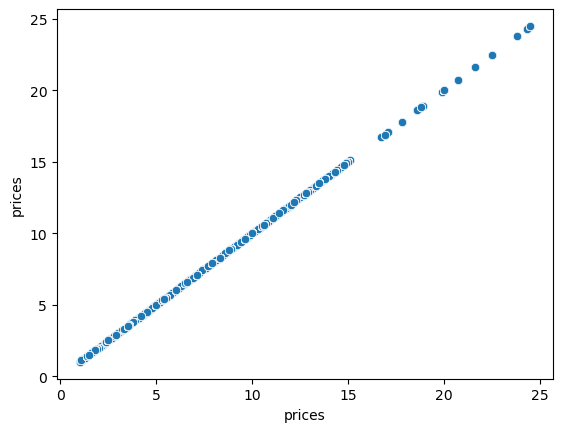

In [13]:
# creating scatterplot
sns.scatterplot(x = 'prices', y = 'prices',data = ords_prods_merge)

In [14]:
ords_prods_merge.loc[ords_prods_merge['prices'] > 100]

,product_id,product_name,aisle_id,department_id,prices,order_id,user_id,order_number,orders_day_of_week,time_of_order,...,price_range_loc,busiest_day,busiest_days,busiest_period_of_day,max_order,loyalty_flag,average_price,spending_flag,median_orders,order_frequency_flag


# Creating Line Charts

In [15]:
# creating a data subset
df = ords_prods_merge[:2000000]

In [23]:
# creating a list holding true/false values to the test
np.random.seed(4)
dev = np.random.rand(len(ords_prods_merge)) <= 0.7

In [17]:
dev

array([False,  True, False, ..., False,  True, False])

In [18]:
np.random.rand(10)

array([0.14558531, 0.30956713, 0.87468615, 0.50287514, 0.38487566,
       0.60254022, 0.32412759, 0.65601576, 0.62784649, 0.42485982])

In [21]:
#store 70% of the sample in the dataframe big
big = ords_prods_merge[dev]

In [22]:
# store 30% of the sample in the dataframe small
small = ords_prods_merge[~dev]

In [24]:
len(ords_prods_merge)

1000000

In [25]:
len(big) + len(small)

1000000

In [26]:
df_2 = small[['orders_day_of_week','prices']]

C:\Users\repla\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\repla\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\repla\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\repla\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.

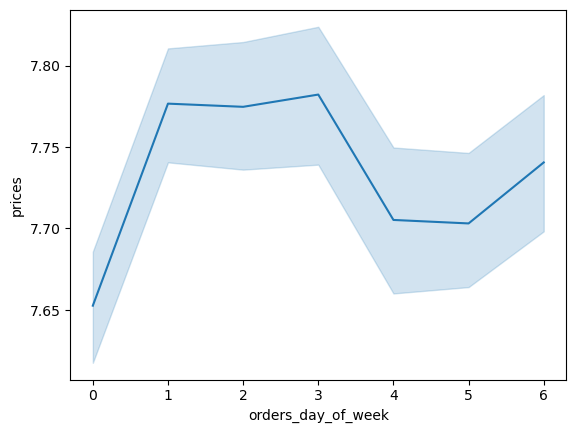

In [27]:
#create line chart
line = sns.lineplot(data = df_2, x = 'orders_day_of_week',y = 'prices')